In [1]:
import glob
import pandas as pd

data_files = glob.glob("chess_ratings/*.csv")
all_dfs = [pd.read_csv(file, sep='|') for file in data_files]

/tmp/ipykernel_644/750563276.py:5: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  all_dfs = [pd.read_csv(file, sep='|') for file in data_files]


In [2]:
example_df = all_dfs[4].iloc[:10]
example_df

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon
0,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,2018,4
1,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,2018,4
2,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,0,40,0,NaN,2018,4
3,5045886,"A K, Kalshyan",IND,M,NaN,NaN,NaN,NaN,1841,0,20,1964,NaN,2018,4
4,8605360,"A La, Teng Hua",CHN,F,NaN,NaN,NaN,NaN,1915,0,40,1993,wi,2018,4
5,5716373,"A Rajah, Abdul Shukor",MAS,M,NaN,NaN,NaN,NaN,1809,0,40,0,i,2018,4
6,10231447,"A S M Khalid, Hasan",BAN,M,NaN,NaN,NaN,NaN,1585,0,40,1988,NaN,2018,4
7,5080444,"A, Sohita",IND,F,NaN,NaN,NaN,NaN,1447,0,40,1995,wi,2018,4
8,4804929,"A-ALI,Sali Abbas Abdulzahra",IRQ,F,WFM,WFM,NaN,NaN,1762,10,40,2001,w,2018,4
9,10220518,"A. K. M., Kamruzzaman",BAN,M,NaN,NaN,NaN,NaN,1839,0,40,1978,NaN,2018,4


In [3]:
data = pd.concat(all_dfs)
data["Year / month"] = [f"{y} / {m if (len(str(m)) == 2) else ('0' + str(m))}" for y, m in zip(data["Year"], data["Mon"])]

In [4]:
data.head()

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rat,Gms,K,B-day,Flag,Year,Mon,Year / month
0,644498,NaN,FRA,M,NaN,NaN,NaN,NaN,2008,1,20,0,NaN,2017,12,2017 / 12
1,20504578,NaN,MAW,M,NaN,NaN,NaN,NaN,1617,0,40,0,NaN,2017,12,2017 / 12
2,35077023,A Chakravarthy,IND,M,NaN,NaN,NaN,NaN,1151,0,40,1986,i,2017,12,2017 / 12
3,10207538,"A E M, Doshtagir",BAN,M,NaN,NaN,NaN,NaN,1840,0,40,1974,i,2017,12,2017 / 12
4,10206612,"A K M, Sourab",BAN,M,NaN,NaN,NaN,NaN,1708,4,40,0,NaN,2017,12,2017 / 12


In [5]:
def get_maxlen_str(x):
    maxl = max([len(c) for c in x])
    for c in x:
        if len(c) == maxl:
            return c
    return ''

In [11]:
cols = ['ID Number', 'Year', 'Sex', 'B-day', 'Rat', 'Gms']
titcols =  ['Tit', 'WTit', 'OTit', 'FOA']
cols += titcols

data[titcols] = data[titcols].fillna('')

agg = {'Rat': 'mean', 'Gms': ['sum', 'mean']}
for c in titcols:
    agg[c] = lambda x: get_maxlen_str(x)

agg_rating = data[cols].groupby(['ID Number', 'Year', 'Sex', 'B-day']).agg(agg)
agg_rating

Rat  Gms             Tit     WTit     OTit  \
                                 mean  sum   mean <lambda> <lambda> <lambda>   
ID Number Year Sex B-day                                                       
100013    2017 M   1957   2417.000000    4   4.00       GM                     
          2018 M   1957   2417.166667  126  10.50       GM                     
          2019 M   1957   2417.583333   87   7.25       GM                     
100021    2017 M   1947   2422.000000    0   0.00       GM                     
          2018 M   1947   2422.000000    0   0.00       GM                     
...                               ...  ...    ...      ...      ...      ...   
651022230 2019 M   1955   1331.000000    8   8.00                              
651022974 2019 M   1990   1308.000000    6   6.00                              
651023040 2019 M   1959   1112.000000    7   7.00                              
651023059 2019 M   2006   1640.000000   10  10.00                              
651023148 2019 M   1948   1543.000000    6   6.00                              

                              FOA  
                         <lambda>  
ID Number Year Sex B-day           
100013    2017 M   1957            
          2018 M   1957            
          2019 M   1957            
100021    2017 M   1947            
          2018 M   1947            
...                           ...  
651022230 2019 M   1955            
651022974 2019 M   1990            
651023040 2019 M   1959            
651023059 2019 M   2006            
651023148 2019 M   1948            

[972111 rows x 7 columns]

In [30]:
agg_rating_res = agg_rating.reset_index()
agg_rating_res.columns = [(':'.join(c) if c[1] else c[0]) for c in agg_rating_res.columns]
agg_rating_res['B-day'] -= 2019
agg_rating_res['B-day'] *= -1
agg_rating_res = agg_rating_res[(agg_rating_res['B-day'] > 0) & (agg_rating_res['B-day'] < 100)]
agg_rating_res['B-day'] = pd.cut(agg_rating_res['B-day'], 3)
print(agg_rating_res['B-day'].max())
agg_rating_res.set_index(['ID Number', 'Sex', 'B-day'], inplace=True)
agg_rating_res

(67.667, 99.0]


Year     Rat:mean  Gms:sum  Gms:mean  \
ID Number Sex B-day                                                    
100013    M   (36.333, 67.667]  2017  2417.000000        4      4.00   
              (36.333, 67.667]  2018  2417.166667      126     10.50   
              (36.333, 67.667]  2019  2417.583333       87      7.25   
100021    M   (67.667, 99.0]    2017  2422.000000        0      0.00   
              (67.667, 99.0]    2018  2422.000000        0      0.00   
...                              ...          ...      ...       ...   
651022230 M   (36.333, 67.667]  2019  1331.000000        8      8.00   
651022974 M   (4.906, 36.333]   2019  1308.000000        6      6.00   
651023040 M   (36.333, 67.667]  2019  1112.000000        7      7.00   
651023059 M   (4.906, 36.333]   2019  1640.000000       10     10.00   
651023148 M   (67.667, 99.0]    2019  1543.000000        6      6.00   

                               Tit:<lambda> WTit:<lambda> OTit:<lambda>  \
ID Number Sex B-day                                                       
100013    M   (36.333, 67.667]           GM                               
              (36.333, 67.667]           GM                               
              (36.333, 67.667]           GM                               
100021    M   (67.667, 99.0]             GM                               
              (67.667, 99.0]             GM                               
...                                     ...           ...           ...   
651022230 M   (36.333, 67.667]                                            
651022974 M   (4.906, 36.333]                                             
651023040 M   (36.333, 67.667]                                            
651023059 M   (4.906, 36.333]                                             
651023148 M   (67.667, 99.0]                                              

                               FOA:<lambda>  
ID Number Sex B-day                          
100013    M   (36.333, 67.667]               
              (36.333, 67.667]               
              (36.333, 67.667]               
100021    M   (67.667, 99.0]                 
              (67.667, 99.0]                 
...                                     ...  
651022230 M   (36.333, 67.667]               
651022974 M   (4.906, 36.333]                
651023040 M   (36.333, 67.667]               
651023059 M   (4.906, 36.333]                
651023148 M   (67.667, 99.0]                 

[945316 rows x 8 columns]

In [32]:
drop_cols = [c for c in r_17.columns if 'lambda' in c]

r_17 = agg_rating_res[agg_rating_res['Year'] == 2017]
r_18 = agg_rating_res[agg_rating_res['Year'] == 2018]
r_19 = agg_rating_res[agg_rating_res['Year'] == 2019]

r_17_t = r_17.drop(columns=drop_cols)
r_18_t = r_18.drop(columns=drop_cols)
r_19_t = r_19.drop(columns=drop_cols)

In [58]:
def add_tit_columns(d, r):
    return d.merge(r[drop_cols].reset_index().drop(columns=['Sex', 'B-day']), on='ID Number')

def get_longer_val(d, c):
    lc = []
    for valx, valy in zip(d[f'{c}_x'], d[f'{c}_y']):
        lc.append(valx if len(valx) >= len(valy) else valy)
        
    return lc

def fix_tit_cols(d):
    cols = d.columns
    
    for c in cols:
        if 'lambda' not in c or c not in d.columns:
            continue

        v = c[:-2]
        name = v.split(':')[0]
        d[name] = get_longer_val(d, v)
        
        d.drop(columns=[f'{v}_x', f'{v}_y'], inplace=True)
    

diff1 = r_18_t - r_17_t
diff1 = diff1[~diff1['Year'].isna()].reset_index()
diff1 = add_tit_columns(diff1, r_17)
diff1 = add_tit_columns(diff1, r_18)
fix_tit_cols(diff1)

diff2 = r_19_t - r_18_t
diff2 = diff2[~diff2['Year'].isna()].reset_index()
diff2 = add_tit_columns(diff2, r_19)
diff2 = add_tit_columns(diff2, r_18)
fix_tit_cols(diff2)

diff1

,ID Number,Sex,B-day,Year,Rat:mean,Gms:sum,Gms:mean,Tit,WTit,OTit,FOA
0,100013,M,"(36.333, 67.667]",1.0,0.166667,122.0,6.500000,GM,,,
1,100021,M,"(67.667, 99.0]",1.0,0.000000,0.0,0.000000,GM,,,
2,100048,M,"(4.906, 36.333]",1.0,0.000000,0.0,0.000000,,,,
3,100064,M,"(4.906, 36.333]",1.0,0.000000,0.0,0.000000,,,,
4,100072,M,"(36.333, 67.667]",1.0,6.666667,21.0,1.750000,IM,,,
...,...,...,...,...,...,...,...,...,...,...,...
285046,383266908,M,"(4.906, 36.333]",1.0,-2.333333,0.0,-3.666667,,,,
285047,393199970,M,"(4.906, 36.333]",1.0,19.000000,6.0,0.500000,,,,AIM
285048,393199980,M,"(4.906, 36.333]",1.0,65.250000,99.0,2.750000,,,,AFM
285049,396215844,M,"(36.333, 67.667]",1.0,0.000000,0.0,0.000000,,,,AIM


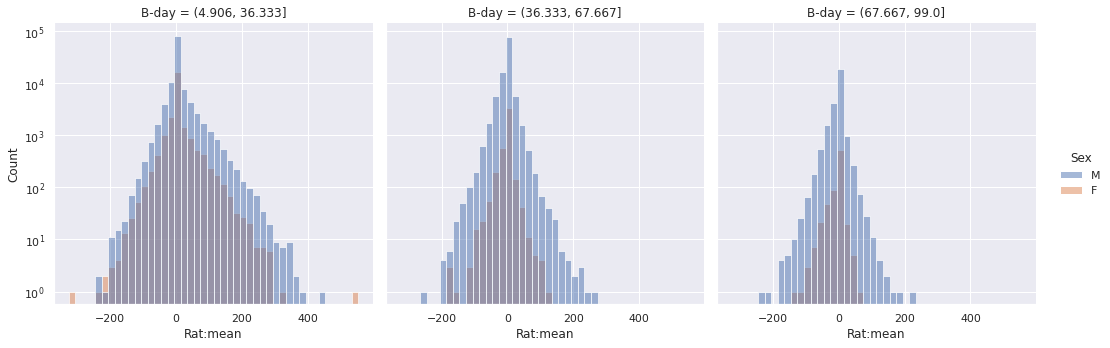

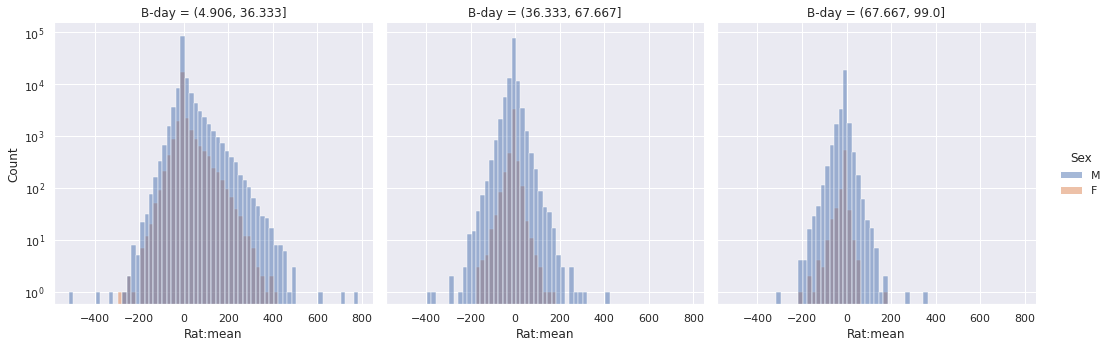

In [10]:
#plt.title('Rating')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


def displot_sth(d, s, bins=20):
    sns.displot(d, x=s, hue='Sex', col='B-day', binwidth=bins, col_order=sorted(d['B-day'].unique()))
    plt.yscale('log')
    plt.show()
    
what = 'Rat:mean'
displot_sth(diff1, what)
displot_sth(diff2, what)

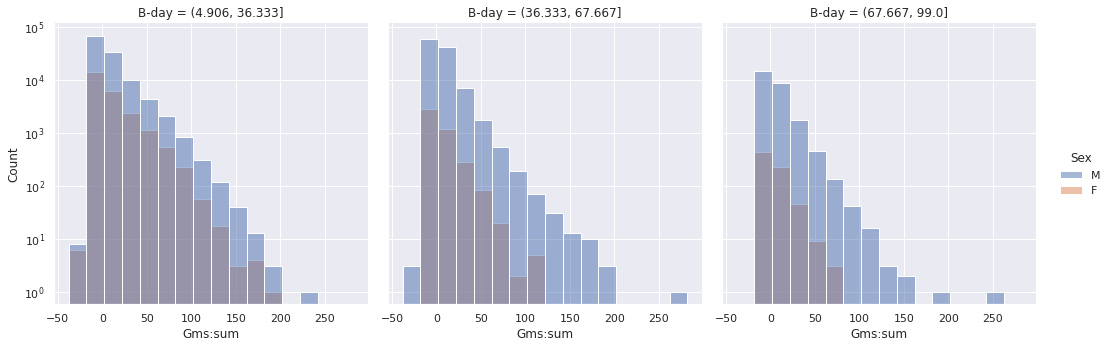

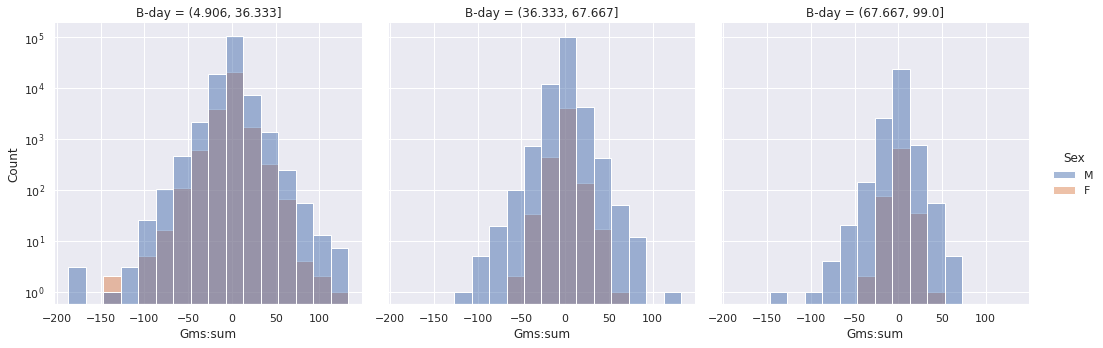

In [11]:
what = 'Gms:sum'
displot_sth(diff1, what)
displot_sth(diff2, what)

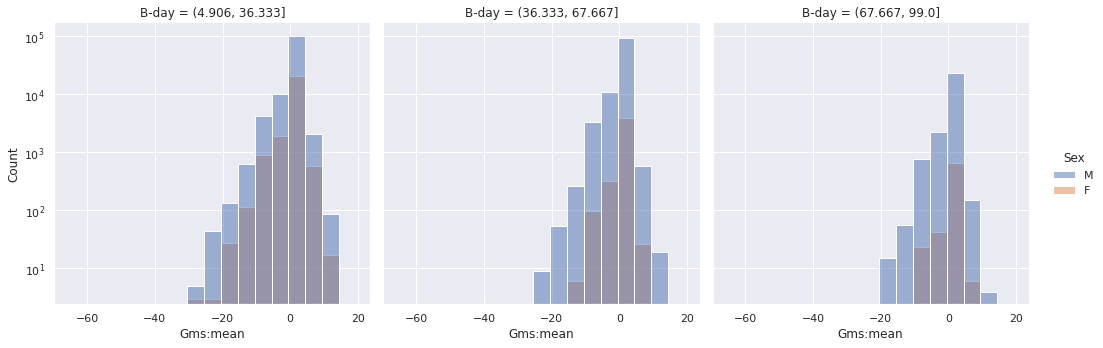

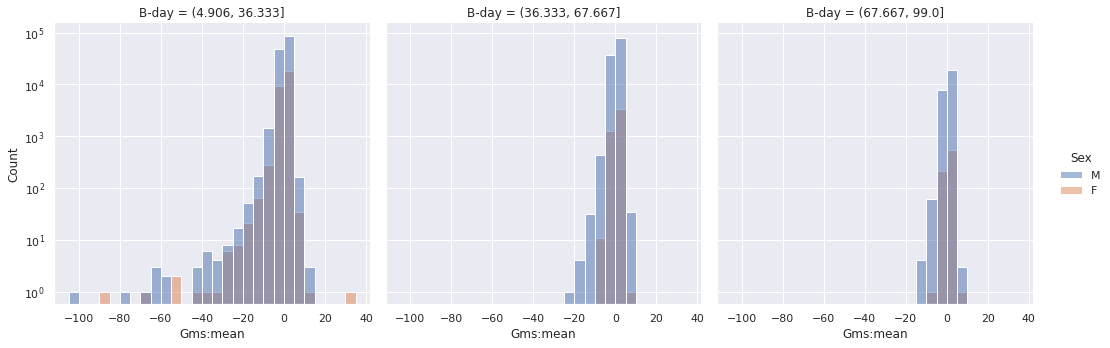

In [12]:
what = 'Gms:mean'
displot_sth(diff1, what, bins=5)
displot_sth(diff2, what, bins=5)

In [59]:
cols = ['ID Number', 'Rat:mean'] #'Gms:sum', 'Gms:mean']

full_data = pd.merge(diff1, diff2[cols], on='ID Number').drop_duplicates('ID Number')
full_data

,ID Number,Sex,B-day,Year,Rat:mean_x,Gms:sum,Gms:mean,Tit,WTit,OTit,FOA,Rat:mean_y
0,100013,M,"(36.333, 67.667]",1.0,0.166667,122.0,6.500000,GM,,,,0.416667
1,100021,M,"(67.667, 99.0]",1.0,0.000000,0.0,0.000000,GM,,,,0.000000
2,100048,M,"(4.906, 36.333]",1.0,0.000000,0.0,0.000000,,,,,0.000000
3,100064,M,"(4.906, 36.333]",1.0,0.000000,0.0,0.000000,,,,,0.000000
4,100072,M,"(36.333, 67.667]",1.0,6.666667,21.0,1.750000,IM,,,,17.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
286894,383266908,M,"(4.906, 36.333]",1.0,-2.333333,0.0,-3.666667,,,,,-11.666667
286895,393199970,M,"(4.906, 36.333]",1.0,19.000000,6.0,0.500000,,,,AIM,0.000000
286896,393199980,M,"(4.906, 36.333]",1.0,65.250000,99.0,2.750000,,,,AFM,158.583333
286897,396215844,M,"(36.333, 67.667]",1.0,0.000000,0.0,0.000000,,,,AIM,-2.000000


In [60]:
xorig = full_data.drop(columns=['ID Number', 'Year', 'Rat:mean_y'])
ydata = full_data['Rat:mean_y'].to_numpy()
ydata = (ydata > 5).astype(int)
print(ydata, sum(ydata), len(ydata), (sum(ydata) / len(ydata)).round(2))
xorig

[0 0 0 ... 1 0 0] 50923 283709 0.18


,Sex,B-day,Rat:mean_x,Gms:sum,Gms:mean,Tit,WTit,OTit,FOA
0,M,"(36.333, 67.667]",0.166667,122.0,6.500000,GM,,,
1,M,"(67.667, 99.0]",0.000000,0.0,0.000000,GM,,,
2,M,"(4.906, 36.333]",0.000000,0.0,0.000000,,,,
3,M,"(4.906, 36.333]",0.000000,0.0,0.000000,,,,
4,M,"(36.333, 67.667]",6.666667,21.0,1.750000,IM,,,
...,...,...,...,...,...,...,...,...,...
286894,M,"(4.906, 36.333]",-2.333333,0.0,-3.666667,,,,
286895,M,"(4.906, 36.333]",19.000000,6.0,0.500000,,,,AIM
286896,M,"(4.906, 36.333]",65.250000,99.0,2.750000,,,,AFM
286897,M,"(36.333, 67.667]",0.000000,0.0,0.000000,,,,AIM


In [61]:
import sklearn
from sklearn.compose import ColumnTransformer

titcols = ['Tit', 'WTit', 'OTit', 'FOA']

ct = sklearn.compose.ColumnTransformer([
    ('onehot', sklearn.preprocessing.OneHotEncoder(drop='if_binary'), ['B-day', 'Sex'] + titcols),
], remainder='passthrough')

xdata = ct.fit_transform(xorig)

In [62]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest, idxtrain, idxtest = train_test_split(xdata, ydata, xorig.index, test_size=0.2)

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)

In [64]:
rf.score(xtest, ytest)

0.8427267279968983

/home/gabi/.env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


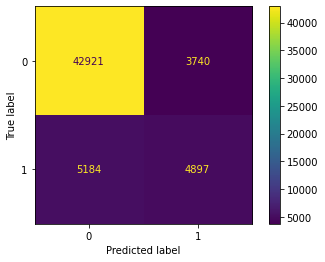

In [65]:
sklearn.metrics.plot_confusion_matrix(rf, xtest, ytest)

In [66]:
fails = xorig.loc[idxtest[pred != ytest]].copy()
fails['label'] = ytest[pred != ytest]
fails

,Sex,B-day,Rat:mean_x,Gms:sum,Gms:mean,Tit,WTit,OTit,FOA,label
100517,F,"(4.906, 36.333]",12.916667,26.0,-1.500000,,,,,0
11429,M,"(36.333, 67.667]",-27.666667,4.0,-0.583333,,,,,1
274782,M,"(4.906, 36.333]",64.166667,6.0,0.500000,,,,,0
70335,M,"(67.667, 99.0]",0.833333,1.0,0.083333,,,,,1
7518,M,"(36.333, 67.667]",12.000000,9.0,-1.083333,,,,,0
...,...,...,...,...,...,...,...,...,...,...
84761,M,"(36.333, 67.667]",12.500000,8.0,-3.916667,,,,,0
95726,M,"(4.906, 36.333]",0.000000,0.0,0.000000,,,,,1
158184,M,"(36.333, 67.667]",7.250000,3.0,0.250000,,,,,0
107759,M,"(4.906, 36.333]",9.250000,14.0,1.166667,CM,,,,1


In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest, pred)

0.7028063555520253

In [68]:
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_score(ytest, np.zeros((len(ytest), )))

0.8223361883613549